In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 
from bs4 import BeautifulSoup
import urllib.request as REQ

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
url = 'http://www.yes24.com/24/category/bestseller?CategoryNumber=001&sumgb=06&fetchSize=40&PageNumber=1'

In [3]:
response = REQ.urlopen(url)
soup = BeautifulSoup(response,'html5lib')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html><head><base href="http://www.yes24.com/24/"/>
	<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
	<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
	<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
	<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
	<meta content="width=1170" name="viewport"/>

	<title>YES24 | 대한민국 대표 인터넷서점 | 베스트셀러</title>

	<meta content="YES24 - 대한민국 대표 인터넷서점" name="title"/>
	<meta content="YES24는 대한민국 1위 인터넷 온라인 서점 입니다. 국내 최대의 도서정보를 보유하고 있으며, 음반, DVD, 공연, 영화까지 다양한 문화 콘텐츠 및 서비스를 제공합니다." name="description"/>
	<meta content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 영화, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘" name="keywords"/>
	<meta content="https://secimage.yes24.com/sysimage/renew/logo_meta.png" property="og:image"/>



가저올 책사이트의 url가저오기

In [73]:
tbody = soup.select('#category_layout > tbody')
resUrl = []
sresUrl = []
for tr in tbody:
    for a in tr.select('.goodsImgW > a'):
        resUrl.append(a['href'])
for i in resUrl:
    if 'Product' in i:
        sresUrl.append(i)
sresUrl

['/Product/Goods/91065309',
 '/Product/Goods/93522583',
 '/Product/Goods/93068681',
 '/Product/Goods/94489333',
 '/Product/Goods/92462696',
 '/Product/Goods/95563770',
 '/Product/Goods/93513663',
 '/Product/Goods/95553694',
 '/Product/Goods/22793441',
 '/Product/Goods/95926892',
 '/Product/Goods/67362730',
 '/Product/Goods/16384156',
 '/Product/Goods/96071849',
 '/Product/Goods/85156209',
 '/Product/Goods/95538356',
 '/Product/Goods/85599080',
 '/Product/Goods/63038113',
 '/Product/Goods/90428162',
 '/Product/Goods/95605209',
 '/Product/Goods/95926663',
 '/Product/Goods/86895472',
 '/Product/Goods/95766310',
 '/Product/Goods/96069908',
 '/Product/Goods/90367403',
 '/Product/Goods/96069962',
 '/Product/Goods/37300128',
 '/Product/Goods/95308338',
 '/Product/Goods/96363292',
 '/Product/Goods/92099619',
 '/Product/Goods/95997976',
 '/Product/Goods/91165853',
 '/Product/Goods/94772082',
 '/Product/Goods/64694842',
 '/Product/Goods/95791680',
 '/Product/Goods/57992378',
 '/Product/Goods/847

크롤링 

In [231]:
baseUrl = 'http://www.yes24.com'
res = []
for h in sresUrl:
    response = REQ.urlopen(baseUrl+h)
    soup = BeautifulSoup( response, 'html5lib')
    res.append({
        'name':soup.select('.gd_name')[0].string,
        'price':int(soup.select('.yes_m')[0].string.replace('원','').replace(',',"")),
        'rate' : float(soup.select('.yes_b')[0].string),
        'saleRate':int(soup.select('.gd_sellNum')[0].text[-29:-20].replace('수','').replace('지','').replace(',',"").strip()),
        'category':soup.select('#infoset_goodsCate > div.infoSetCont_wrap > dl:nth-child(1) > dd > ul > li:nth-child(1) > a:nth-child(4)')[0].string,
        'pages':int(soup.select('.b_size >tr>td')[1].string[0:4].replace('쪽','').strip())
    })


# response = REQ.urlopen(exUrl)
# soup = BeautifulSoup( response, 'html5lib')
#     soup.select('.gd_name')[0].string
# int(soup.select('.yes_m')[0].string.replace('원','').replace(',',""))
# soup.select('.gd_sellNum')[0].text[-29:-20]
#     float(soup.select('.yes_b')[0].string)
# soup.select('.b_size >tr>td')[1].string[0:4].replace('쪽','').strip()
# soup.select('#infoset_goodsCate > div.infoSetCont_wrap > dl:nth-child(1) > dd > ul > li:nth-child(1) > a:nth-child(4)')[0].string


In [233]:
bookDF = pd.DataFrame(res)

In [258]:
c = bookDF.groupby('category').sum()['saleRate']

카테고리별 총판매량 표시

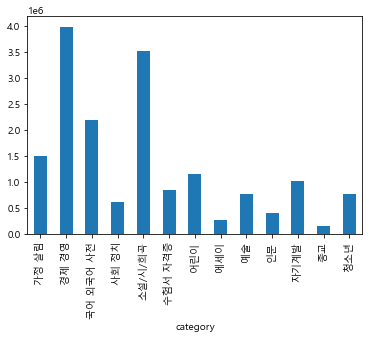

In [264]:
c.plot(kind = 'bar')
plt.show()

판매량이 100만건이상인 책을 가격순으로 정렬

In [263]:
bookDF[bookDF['saleRate']>=1000000].sort_values(by = 'price')

,name,price,rate,saleRate,category,pages
0,달러구트 꿈 백화점,13800,9.5,1085715,소설/시/희곡,300
1,어떻게 말해줘야 할까,17500,9.8,1253511,가정 살림,400
